In [70]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import plotly.graph_objects as pgo
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from scipy import stats

In [71]:
Maternal_Health = pd.read_csv("Maternal Health Risk Data Set.csv")
Maternal_Health.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [72]:
col_names = ['Age', 'SystolicBP', 'DiastolicBP', 'BloodSugar', 'BodyTemp', 'HeartRate', 'RiskLevel']
Maternal_Health.columns = col_names
Maternal_Health.head()

# SystolicBP -> Upper value of Blood Pressure in mmHg, another significant attribute during pregnancy.
# DiasolicBP -> Lower value of Blood Pressure in mmHg, another significant attribute during pregnancy.


,Age,SystolicBP,DiastolicBP,BloodSugar,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [73]:
num_instances = Maternal_Health.shape[0]
num_attributes = Maternal_Health.shape[1]

print("Number of instances:", num_instances)
print("Number of attributes:", num_attributes)


Maternal_Health.dtypes


Number of instances: 1014
Number of attributes: 7


Age              int64
SystolicBP       int64
DiastolicBP      int64
BloodSugar     float64
BodyTemp       float64
HeartRate        int64
RiskLevel       object
dtype: object

In [74]:
# Summary Statistics of continuous features

continuous_features = ['Age', 'SystolicBP', 'DiastolicBP', 'BloodSugar', 'BodyTemp', 'HeartRate']
Maternal_Health[continuous_features].describe()




,Age,SystolicBP,DiastolicBP,BloodSugar,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


In [75]:
bp_compare = Maternal_Health[['SystolicBP', 'DiastolicBP', 'RiskLevel']]
bp_compare.head(10)

,SystolicBP,DiastolicBP,RiskLevel
0,130,80,high risk
1,140,90,high risk
2,90,70,high risk
3,140,85,high risk
4,120,60,low risk
5,140,80,high risk
6,130,70,mid risk
7,85,60,high risk
8,120,90,mid risk
9,130,80,high risk


Missing values:
 Age            0
SystolicBP     0
DiastolicBP    0
BloodSugar     0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64


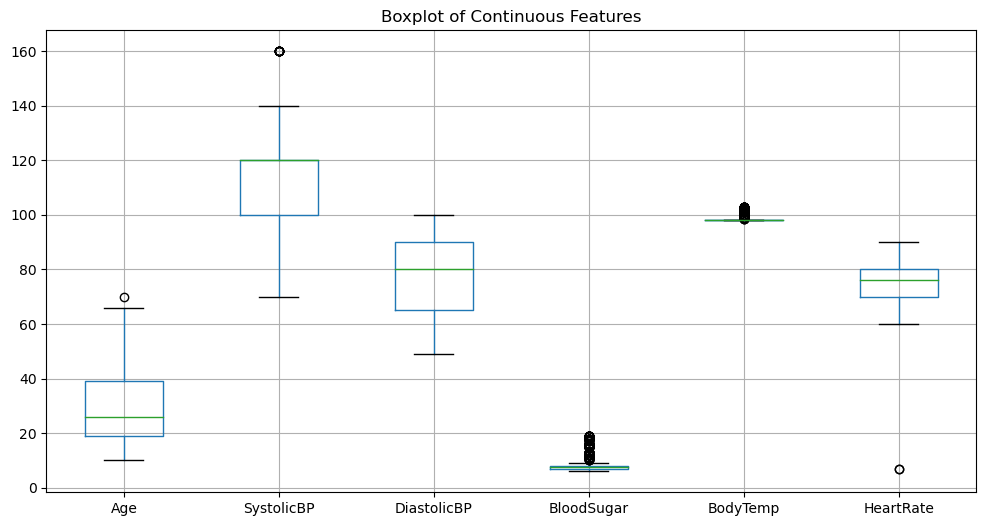

In [76]:
# Check for missing values
missing_values = Maternal_Health.isnull().sum()
print("Missing values:\n", missing_values)

# Check for outliers in continuous features
plt.figure(figsize=(12, 6))
Maternal_Health[continuous_features].boxplot()
plt.title("Boxplot of Continuous Features")
plt.show()


Index(['Age', 'SystolicBP', 'DiastolicBP', 'BloodSugar', 'BodyTemp',
       'HeartRate'],
      dtype='object')


----Indices of outliers detected using z-score:
        Age  SystolicBP  DiastolicBP  BloodSugar  BodyTemp  HeartRate
0     False       False        False       False     False      False
1     False       False        False       False     False      False
2     False       False        False       False     False      False
3     False       False        False       False     False      False
4     False       False        False       False     False      False
...     ...         ...          ...         ...       ...        ...
1009  False       False        False       False     False      False
1010  False       False        False       False     False      False
1011  False       False        False        True     False      False
1012  False       False        False       False     False      False
1013  False       False        False       False     False      Fals

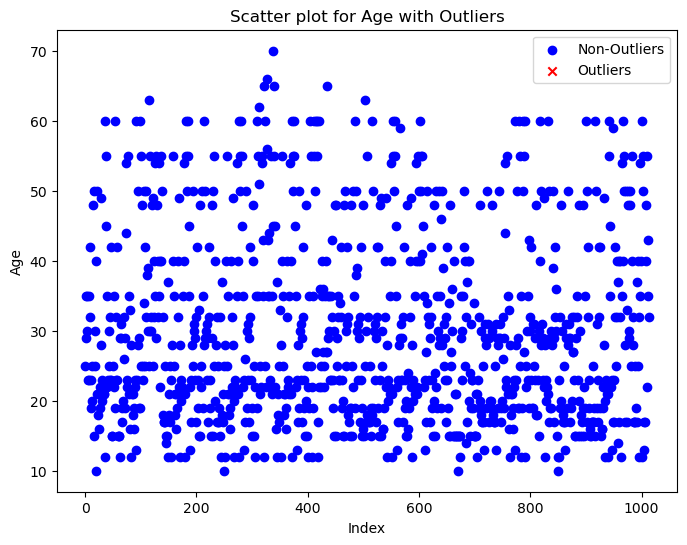

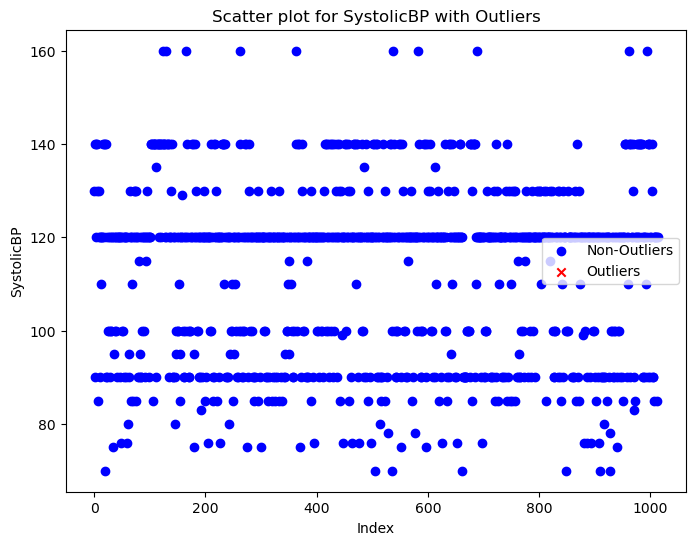

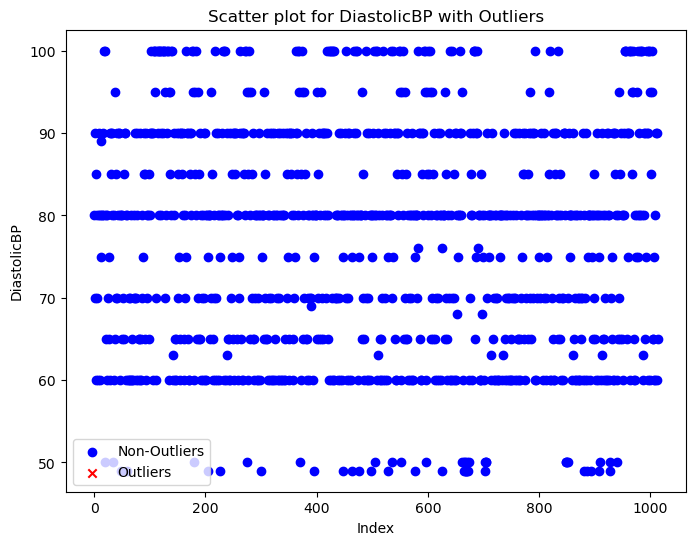

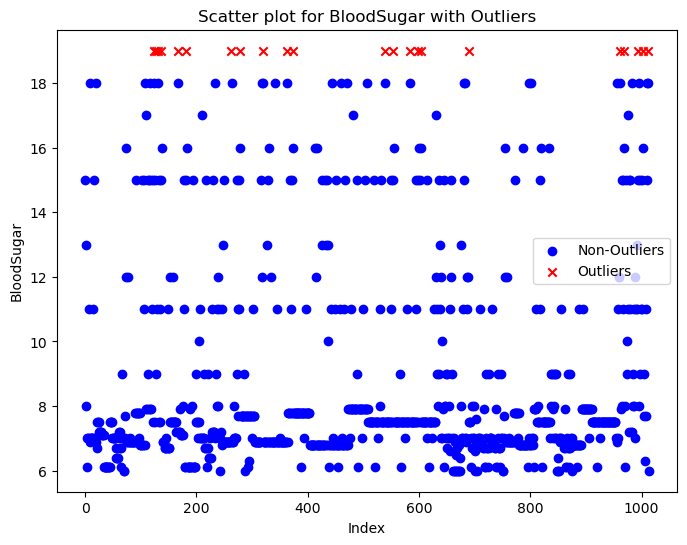

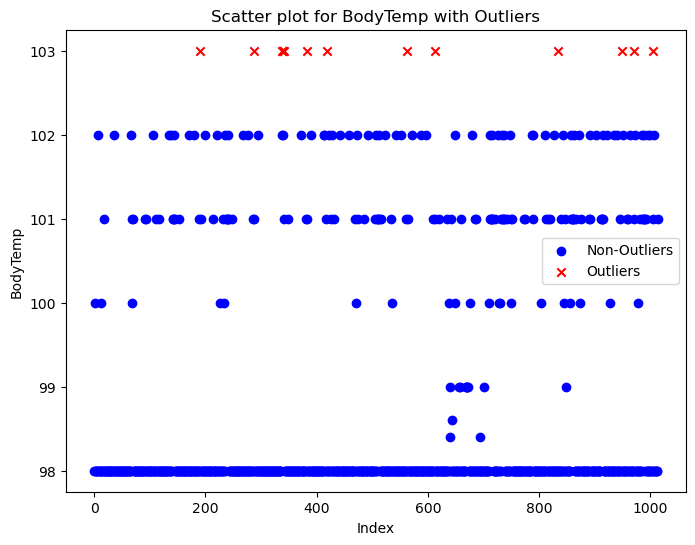

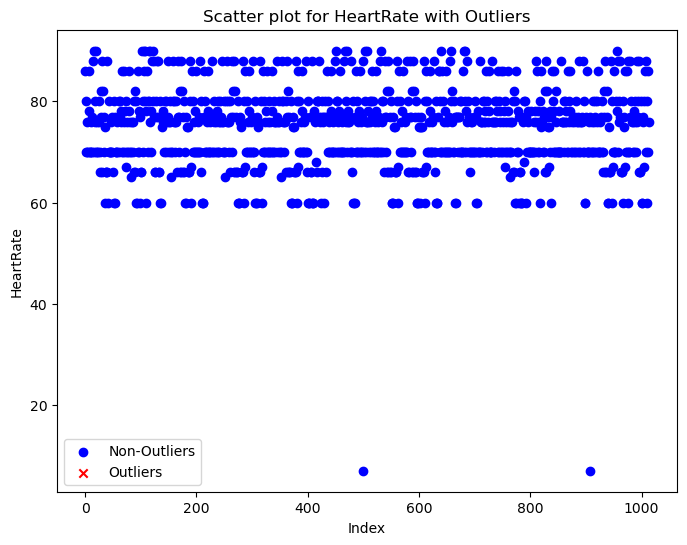

In [77]:
# Possible Z-Score Outliers --- Cleaning step????

numeric_cols = Maternal_Health.select_dtypes(include=['int64', 'float64']).columns

print(numeric_cols)

#Calculate Z-Scores
z_scores = stats.zscore(Maternal_Health[numeric_cols])

#Outlier Detection
# Identify and print outliers based on a threshold (e.g., z-score > 3 or < -3)
numeric_cols = Maternal_Health.select_dtypes(include=['int64', 'float64']).columns

z_scores = stats.zscore(Maternal_Health[numeric_cols])

z_score_threshold = 3

outlier_mask = z_scores > z_score_threshold

print("\n\n----Indices of outliers detected using z-score:")
print(outlier_mask)


for col in numeric_cols:

    plt.figure(figsize=(8, 6))
    plt.scatter(Maternal_Health.index[~outlier_mask[col]], Maternal_Health[col][~outlier_mask[col]], marker='o', label='Non-Outliers', color='blue')
    plt.scatter(Maternal_Health.index[outlier_mask[col]], Maternal_Health[col][outlier_mask[col]], marker='x', label='Outliers', color='red')
    plt.xlabel('Index')
    plt.ylabel(col)
    plt.title(f'Scatter plot for {col} with Outliers')
    plt.legend()
    plt.show()


# blood_sugar = Maternal_Health['BloodSugar']
# top_75_percentile = blood_sugar.quantile(0.75)
# values_greater_than_75_percentile = blood_sugar[blood_sugar > top_75_percentile]

# print(values_greater_than_75_percentile)



In [78]:
mh_dropcat = Maternal_Health.drop(['RiskLevel'], axis=1)
mh_dropcat.head()

df = mh_dropcat[(np.abs(stats.zscore(mh_dropcat)) < 3).all(axis=1)]

In [79]:
df.shape
df.head()

,Age,SystolicBP,DiastolicBP,BloodSugar,BodyTemp,HeartRate
0,25,130,80,15.0,98.0,86
1,35,140,90,13.0,98.0,70
2,29,90,70,8.0,100.0,80
3,30,140,85,7.0,98.0,70
4,35,120,60,6.1,98.0,76


In [80]:

# Define a threshold
z_threshold = 3

# Calculate the z-scores of each value in the DataFrame
numeric_cols = Maternal_Health.select_dtypes(include=['int64', 'float64']).columns

# Create a boolean mask for values with a z-score less than the absolute value of the threshold
mask = np.abs(z_scores) < z_threshold

# Apply the mask to the DataFrame to keep only rows with all values within the threshold
Maternal_Health_OR = Maternal_Health[mask.all(axis=1)]

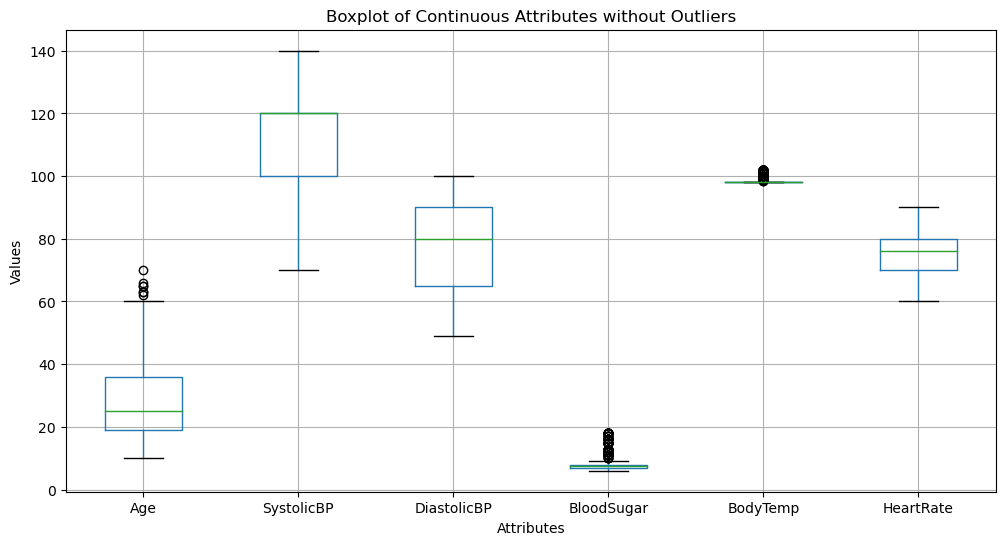

In [81]:
Maternal_Health_OR.count()

plt.figure(figsize=(12, 6))
Maternal_Health_OR[continuous_features].boxplot()
plt.title("Boxplot of Continuous Attributes without Outliers")
plt.xlabel("Attributes")
plt.ylabel("Values")
plt.show()



Text(0.5, 1.0, 'Distribution of Risk Levels for Maternal Health')

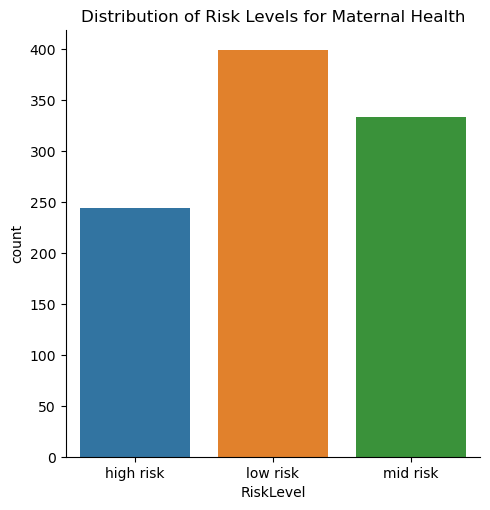

In [82]:
sns.catplot(x='RiskLevel', kind='count', data=Maternal_Health_OR)
plt.title("Distribution of Risk Levels for Maternal Health")

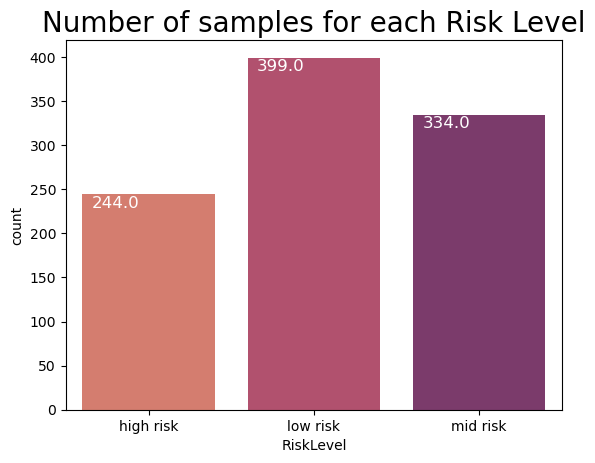

In [83]:
ax = sns.countplot(x="RiskLevel", data=Maternal_Health_OR, palette="flare")
ax.set_title('Number of samples for each Risk Level', fontsize=20)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='center', color='white', size=12)
plt.show()

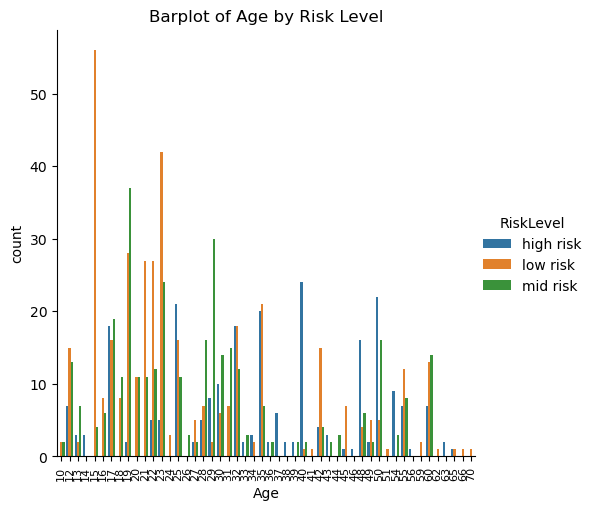

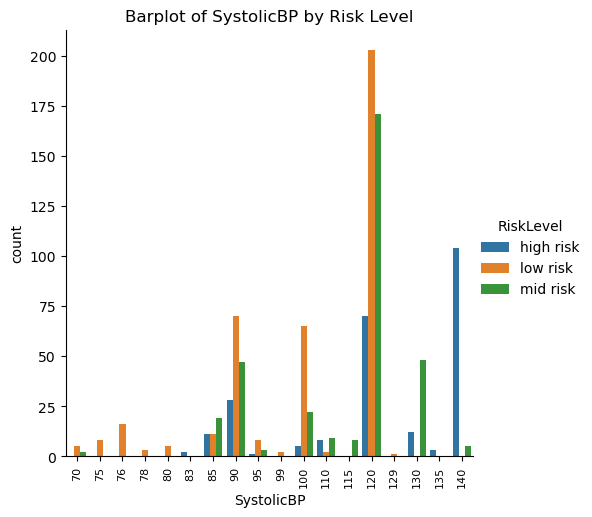

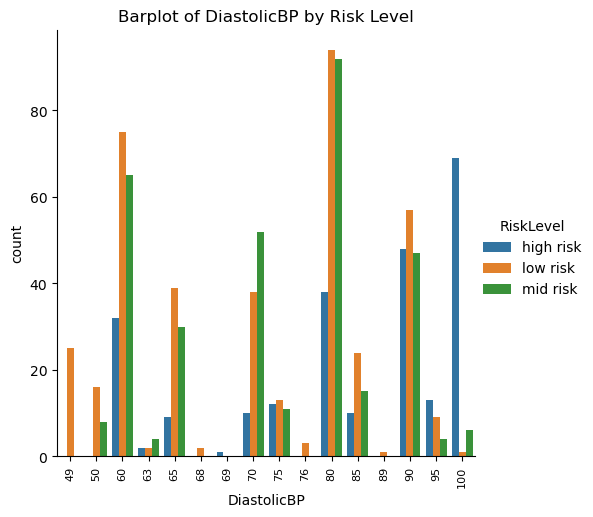

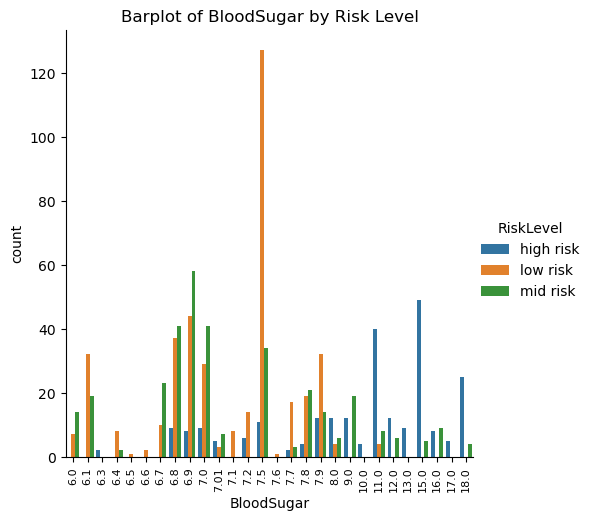

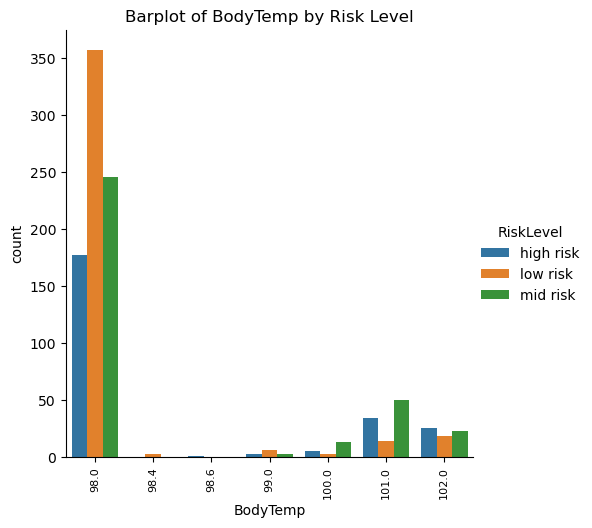

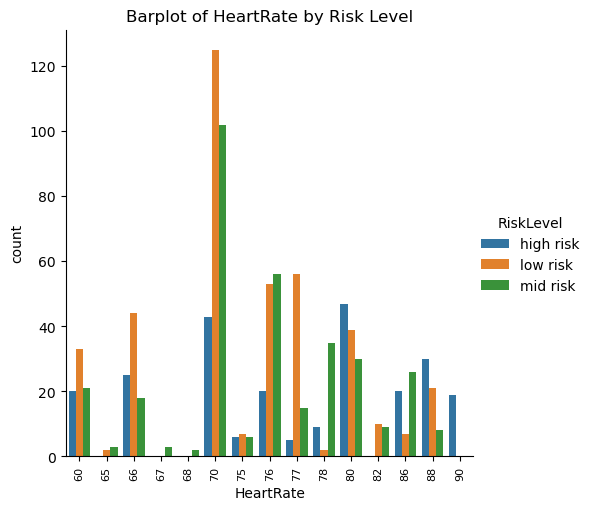

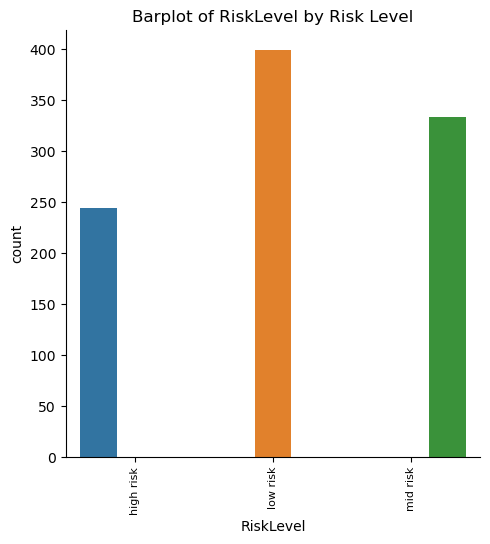

In [87]:
def create_catplot(data, x_column, hue, kind="count"):
    sns.catplot(data=data, x=x_column, hue="RiskLevel", kind=kind)
    plt.title(f"Barplot of {x_column} by Risk Level")
    plt.xticks(rotation=90, fontsize=8)

for column in col_names:
    create_catplot(Maternal_Health_OR,column,'RiskLevel')

plt.show()